# Machine learning Wandelaars


## Packages installeren

In [1]:
import pickle
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns
import json
import collections
from math import sqrt
from random import randrange
from random import seed


# classifiers & testing
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier


## Data inlezen
Data inlezen. Trainingsdata in data (X) en klasse/label (y) voor alle dagen van de week.
Trainingsdata in data (Xwd) en klasse (ywd) voor alleen de werkdagen.

En kijken waar het uit bestaat en hoe het is opgebouwd.

In [2]:
X, y = pickle.load(open("Fitbit_coaching1120.p", "rb"))

Lengte?

In [3]:
len(X), len(y)

(124, 124)

Welke klassen/labels zijn er?

In [4]:
np.unique(y)

array([0, 1], dtype=int64)

Hoe vaak komen deze klassen/labels voor?

In [5]:
collections.Counter(y)

Counter({0: 65, 1: 59})

Omgerekend naar percentages

In [6]:
t_tel=collections.Counter(y)

In [7]:
for t in np.unique(y):
    print(t,t_tel[t]/len(y)*100)

0 52.41935483870967
1 47.58064516129033


### Conclusie percentages
Dus 52,5% van de werkdagen heeft de kandidaat minder dan 8000 stappen tijdens werkuren gemaakt en 47,5% 8000 of meer stappen. Dus in 52,5% zou extra coaching tijdens de dag kunnen helpen.

Wat is het type van de data?

In [8]:
type(X)

numpy.ndarray

Hoe zien de elementen van de array er uit?

In [10]:
X[1]

array([ 1150.,   543.,    75.,   144.,  3740.,   862.])

Range van de kenmerken liggen ver uitelkaar. Normalisatie uitvoeren op de data.

In [11]:
normalizer=Normalizer()

In [12]:
X_norm=normalizer.transform(X)

In [13]:
X_norm[1]

array([ 0.28419455,  0.13418926,  0.01853443,  0.0355861 ,  0.92425012,
        0.21302235])

Train data splitsen in 90% trainen en 10% testen.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.1, random_state=0)

In [15]:
len(X_train), len(y_train)

(111, 111)

## Learning algoritme
We proberen Logistic Regression, SVM, Naive Bayes, Neural Net en Decision Tree en Ensemble als learning algoritme.

#### Logistic regression

In [16]:
lr = LogisticRegression()

In [17]:
# initialize parameters
c_params = [0.01, 0.03, 0.1, 0.3, 1, 3]
solver_params = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
parameters = {'solver':solver_params, 'C':c_params}

# perform cross validation grid search
clfLR = GridSearchCV(lr, parameters, cv=10).fit(X_train, y_train)


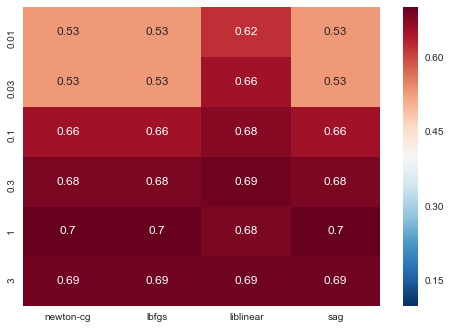

In [18]:
scores = clfLR.cv_results_['mean_test_score'].reshape(len(c_params), len(solver_params))
sns.heatmap(scores, center=0.4, yticklabels=c_params, xticklabels=solver_params, annot=True);

In [19]:
clfLR.best_params_, clfLR.best_score_

({'C': 1, 'solver': 'newton-cg'}, 0.70270270270270274)

#### Support Vector Machines

In [20]:
# initialize parameters
c_params = [0.01, 0.03, 0.1, 0.3, 1, 3]
kernel_params = ['poly', 'rbf'] #standaard SVC
parameters = {'kernel':kernel_params, 'C':c_params}

# perform cross validation grid search
clfSVM = GridSearchCV(SVC(), parameters, cv=10).fit(X_train, y_train)

In [21]:
print(clfSVM.best_params_, clfSVM.best_score_)

{'kernel': 'rbf', 'C': 1} 0.702702702703


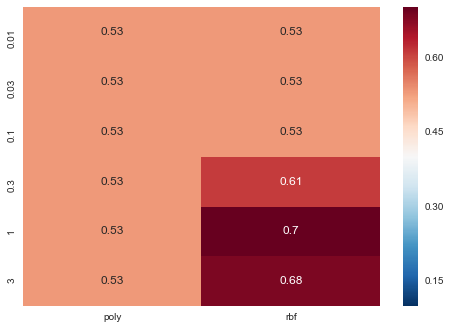

In [22]:
scores = clfSVM.cv_results_['mean_test_score'].reshape(len(c_params), len(kernel_params))
sns.heatmap(scores, center=0.4, yticklabels=c_params, xticklabels=kernel_params, annot=True);

#### Naive Bayes

In [23]:
# initialize parameters
alpha_params = [0.1, 0.3, 0.5, 0.7, 1.0]

parameters = {'alpha':alpha_params}

# perform cross validation grid search
clfNB = GridSearchCV(MultinomialNB(), parameters, cv=10).fit(X_train,y_train)

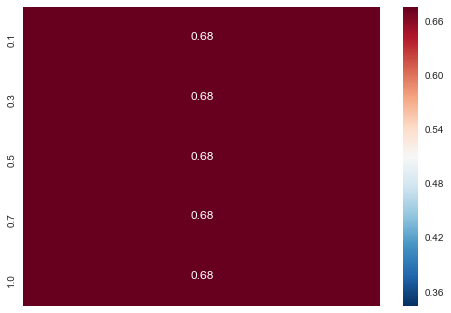

In [24]:
scores = clfNB.cv_results_['mean_test_score'].reshape(len(alpha_params),1)
sns.heatmap(scores, center=0.51, yticklabels=alpha_params, xticklabels='', annot=True);

In [25]:
clfNB.best_params_, clfNB.best_score_

({'alpha': 0.1}, 0.67567567567567566)

#### Neural Net

In [26]:
mlp = MLPClassifier(solver='lbfgs', 
                    activation='logistic',
                    momentum=0.2,
                    tol=0.00001)

In [27]:
hiddenunits_params = [ (50), (100), (150), (200), (300)]
learningrate_params = [0.01, 0.05, 0.1, 0.5, 1.0] 
parameters = {'hidden_layer_sizes':hiddenunits_params, 'learning_rate_init':learningrate_params}

clfMLP = GridSearchCV(mlp, parameters, cv=5).fit(X_train, y_train)

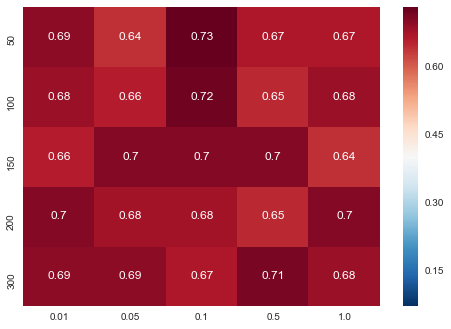

In [28]:
scores = clfMLP.cv_results_['mean_test_score'].reshape(len(hiddenunits_params), len(learningrate_params))
sns.heatmap(scores, center=0.4, yticklabels=hiddenunits_params, xticklabels=learningrate_params, annot=True);

In [29]:
clfMLP.best_params_, clfMLP.best_score_

({'hidden_layer_sizes': 50, 'learning_rate_init': 0.1}, 0.72972972972972971)

#### Decision Tree

In [30]:
tree = DecisionTreeClassifier()

In [31]:
criterion_params = ['gini','entropy']
max_features_params = ['auto','sqrt','log2'] 
parameters = {'criterion':criterion_params, 'max_features':max_features_params}

clfTREE = GridSearchCV(tree, parameters, cv=5).fit(X_train, y_train)

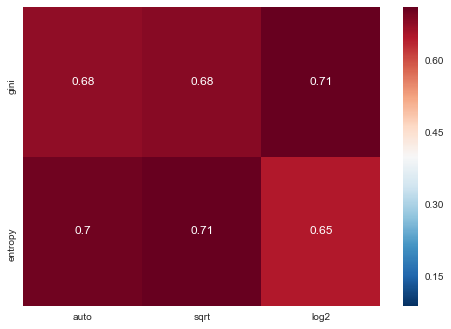

In [32]:
scores = clfTREE.cv_results_['mean_test_score'].reshape(len(criterion_params), len(max_features_params))
sns.heatmap(scores, center=0.4, yticklabels=criterion_params, xticklabels=max_features_params, annot=True);

In [33]:
clfTREE.best_params_, clfTREE.best_score_

({'criterion': 'gini', 'max_features': 'log2'}, 0.71171171171171166)

#### Random forest

In [42]:
forest = RandomForestClassifier(n_estimators=150)

In [43]:
criterion_params = ['gini','entropy']
max_features_params = ['auto','sqrt','log2'] 
parameters = {'criterion':criterion_params, 'max_features':max_features_params}

clfFOREST = GridSearchCV(forest, parameters, cv=10).fit(X_train, y_train)

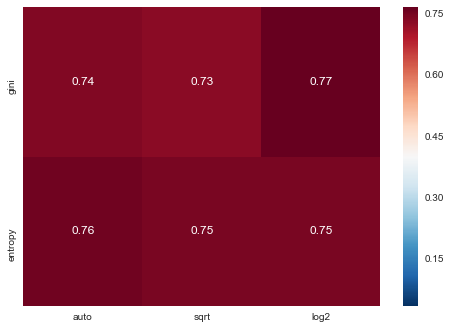

In [44]:
scores = clfFOREST.cv_results_['mean_test_score'].reshape(len(criterion_params), len(max_features_params))
sns.heatmap(scores, center=0.4, yticklabels=criterion_params, xticklabels=max_features_params, annot=True);

In [45]:
clfFOREST.best_params_, clfFOREST.best_score_

({'criterion': 'gini', 'max_features': 'log2'}, 0.76576576576576572)

#### Extra Trees

In [46]:
et = ExtraTreesClassifier(n_estimators=300)

In [47]:
criterion_params = ['gini','entropy']
max_features_params = ['auto','sqrt','log2'] 
parameters = {'criterion':criterion_params, 'max_features':max_features_params}

clfET = GridSearchCV(et, parameters, cv=10).fit(X_train, y_train)

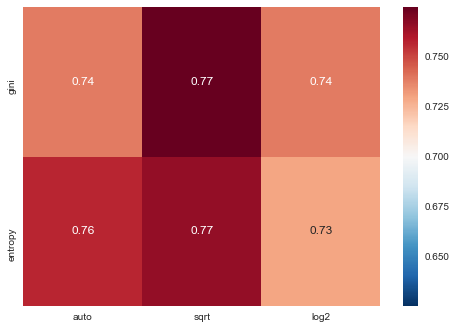

In [48]:
scores = clfET.cv_results_['mean_test_score'].reshape(len(criterion_params), len(max_features_params))
sns.heatmap(scores, center=0.7, yticklabels=criterion_params, xticklabels=max_features_params, annot=True);

In [49]:
clfET.best_params_, clfET.best_score_

({'criterion': 'gini', 'max_features': 'sqrt'}, 0.77477477477477474)

#### k Nearest Neighbours

In [50]:
knn = KNeighborsClassifier(n_neighbors=5)

In [51]:
weights_params = ['uniform','distance']
algorithm_params = ['ball_tree', 'kd_tree', 'brute']
parameters = {'weights':weights_params, 'algorithm':algorithm_params}

clfKNN = GridSearchCV(knn, parameters, cv=10).fit(X_train, y_train)

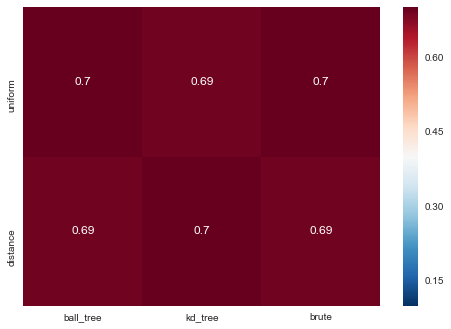

In [52]:
scores = clfKNN.cv_results_['mean_test_score'].reshape(len(weights_params), len(algorithm_params))
sns.heatmap(scores, center=0.4, yticklabels=weights_params, xticklabels=algorithm_params, annot=True);

In [53]:
clfKNN.best_params_, clfKNN.best_score_

({'algorithm': 'ball_tree', 'weights': 'uniform'}, 0.70270270270270274)

## De voorspelling

In [54]:
y_predTREE = clfTREE.predict(X_test)
y_predET = clfET.predict(X_test)
y_predFOREST = clfFOREST.predict(X_test)
y_predMLP = clfMLP.predict(X_test)

In [55]:
f1_score(y_test, y_predTREE, average='macro')

0.67500000000000004

In [56]:
f1_score(y_test, y_predET, average='macro')

0.84523809523809523

In [57]:
f1_score(y_test, y_predFOREST, average='macro')

0.83750000000000013

In [58]:
f1_score(y_test, y_predMLP, average='macro')

0.76363636363636356

In [59]:
collections.Counter(y_test)

Counter({0: 6, 1: 7})

In [60]:
# Thus in binary classification the count of:
#   true negatives is C_{0,0},  
#   false negatives is C_{1,0}, 
#   true positives is C_{1,1} and 
#   false positives is C_{0,1}.
confusion_matrix(y_test, y_predTREE)

array([[3, 3],
       [1, 6]])

In [61]:
confusion_matrix(y_test, y_predET)

array([[5, 1],
       [1, 6]])

In [62]:
confusion_matrix(y_test, y_predFOREST)

array([[4, 2],
       [0, 7]])

In [63]:
confusion_matrix(y_test, y_predMLP)

array([[4, 2],
       [1, 6]])

## Conclusie
Extra Trees en Random Forest geven het beste resultaat. Op basis van de confusion matrix zou ik Random Forest kiezen. Omdat ik false positives zwaarder weeg dan false negatives. Beter wat extra coaching als het niet nodig zou zijn, dan geen coaching als het wel nodig bleek. Met het model kunnen de stappen per uur van de ochtend en lunch ingevoerd worden en voorspelt worden of 8000 stappen tijdens het werk worden behaald en eventueel kan extra coaching voor de middag uitgevoerd worden via een app of mail bijvoorbeeld. Op deze wijze blijft de invloed van extra coaching ook buiten het model.